# Invesitigate a Dataset Project

In this report we will be looking at the titanic dataset.

Considering we all know the Titanic for its disaster (and movie) we should primarily look at what factors affected survival rate. Some questions we will explore will be:

Which gender had higher survivability?

How did age affect survivability?

Did socio-econmic status affect survivability?




In [1]:
#Importing the titanic dataset csv and finding number of records
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline
titanic_df = pd.read_csv('titanic_data.csv')

print(titanic_df.shape)

Populating the interactive namespace from numpy and matplotlib
(891, 12)


## Data Wrangling and Cleaning:
Since the ticket number is in multiple formats and has numbers as low as 600 and as high as 3.5 million we will delete this column as it will not provide any useful information for our purposes.

Sex will be tranformed to 0 for female 1 for male.

Cabin has multiple missing records but we want as many rows of data as possible so we wont remove missing records as they can be used elsewhere

Rows where age is missing will be ommited when considering age as a variable.

In [2]:
#following code in this cell can only run once without errors due to deletion.

del titanic_df['Ticket'] # can only run once or error occurs

titanic_df['Sex'].replace({'female':0, 'male':1},inplace=True)

print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

      Fare Cabin Embarked  
0   7.2500   NaN        S  
1  71.2833   C85        C  
2   7.9250   NaN        S  
3  53.1000  C123        S  
4   8.0500   NaN        S  


## Exploration

Lets look at how many survived and the overall survival rate.


In [3]:
print('Of the {} passengers only {} survived.'.format(titanic_df.Survived.count(),titanic_df.Survived.sum()))
print('about {:.0%} survived the disaster.'.format(titanic_df.Survived.mean()))


Of the 891 passengers only 342 survived.
about 38% survived the disaster.


Lets now look at the correlation between gender and survivability and age vs survivability.

In [4]:
def correlation(x,y):
    std_x = (x-x.mean()) / x.std(ddof=0)
    std_y = (y-y.mean()) / y.std(ddof=0)
    
    return((std_x * std_y).mean())

In [5]:
print('The correlation for gender vs. survivability is {:.3}.'
      .format(correlation(titanic_df['Sex'],titanic_df['Survived'])))
print('The correlation for age vs. survivability is {:.3}.'
      .format(correlation(titanic_df['Age'],titanic_df['Survived'])))





The correlation for gender vs. survivability is -0.543.
The correlation for age vs. survivability is -0.078.


As expected there appears to be a correlation between gender and survivability. In this case being a male seems to lower survivability. Unexpectedly age does not appear to play a large role in survival.

Lets further explore age.

In [6]:
titanic_df.Age.describe(percentiles=None, include=None, exclude=None)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

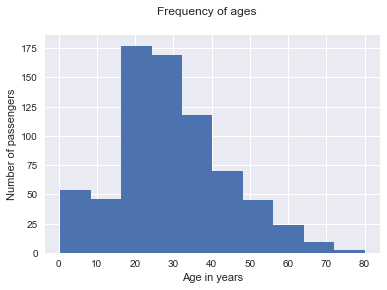

In [15]:
plt.hist(titanic_df['Age'].dropna())
plt.suptitle('Frequency of ages')
plt.xlabel('Age in years')
plt.ylabel('Number of passengers')


We can see a normal looking distribution with a mean around 30. Graph confirms our description of the data.  Lets investigate whether dividing all ages into 3 age groups creates a stronger correlation.

In [8]:
#grouping age by children = 0, teens = 1 and over 18 = 2

def age_to_binary(age):
    if age <= 11 :
        return 0
    elif age <= 17:
        return 1
    else: 
        return 2
    
print(age_to_binary(titanic_df.Age[9])) #way to check code works

def ages_to_binary(ages):
    return titanic_df.Age.apply(age_to_binary)

titanic_df.Ages = ages_to_binary(titanic_df.Age)

print(titanic_df.Ages.head()) #verifying changes

1
0    2
1    2
2    2
3    2
4    2
Name: Age, dtype: int64


In [9]:
print('The correlation for age groups vs. survivability is {:.3}.'
      .format(correlation(titanic_df.Ages,titanic_df['Survived'])))


The correlation for age groups vs. survivability is -0.126.


While the correlation became marginally stronger it is still not very strong. Gender seems to be a bigger factor than age. Perhaps because there are so few teens and children (as shown in chart above) the age variable becomes less important. 

Lets now look at passenger class.

In [10]:
#titanic_df.Pclass.describe(percentiles=None, include=None, exclude=None)

print(titanic_df.groupby('Pclass').count())

        PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Fare  Cabin  \
Pclass                                                                     
1               216       216   216  216  186    216    216   216    176   
2               184       184   184  184  173    184    184   184     16   
3               491       491   491  491  355    491    491   491     12   

        Embarked  
Pclass            
1            214  
2            184  
3            491  


There are more 3rd class passengers than 1st and 2nd combined.

In [11]:
#looking at passenger class correlation with survivability.
print('The correlation for Pclass vs. survivability is {:.3}.'
      .format(correlation(titanic_df['Pclass'],titanic_df['Survived'])))
print('The correlation for Fare Cost vs. survivability is {:.3}.'
      .format(correlation(titanic_df['Fare'],titanic_df['Survived'])))


The correlation for Pclass vs. survivability is -0.338.
The correlation for Fare Cost vs. survivability is 0.257.


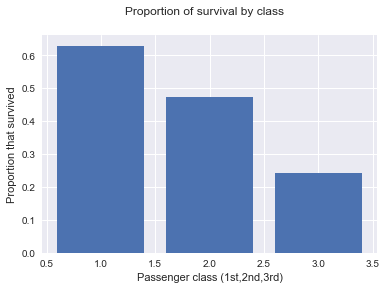

In [16]:
survived_rate =(titanic_df.groupby(['Pclass'],as_index = False).Survived.mean())
survived_rate = pd.DataFrame(survived_rate)
plt.bar(survived_rate['Pclass'],survived_rate['Survived'])
plt.suptitle('Proportion of survival by class')
plt.xlabel('Passenger class (1st,2nd,3rd)')
plt.ylabel('Proportion that survived')

As we can see passenger class does somewhat affect survival rate. We see the same slight correlation when we look at fare cost which we would expect to mirror the passenger class correlation. The graph agrees with our assesment of the correlation as most  passengers from the 1st class survived and for each subsequent class the percentage of survivors decreased. 

In [13]:
survived_rates =(titanic_df.groupby(['Pclass','Sex'],as_index = False).Survived.mean())
survived_rates = pd.DataFrame(survived_rates)
print(survived_rates)

   Pclass  Sex  Survived
0       1    0  0.968085
1       1    1  0.368852
2       2    0  0.921053
3       2    1  0.157407
4       3    0  0.500000
5       3    1  0.135447


As our last exploratory step we looked at how passenger class and sex affected survival together. We can see that nearly every female in our population of 1st class passengers survived (97%) closely followed by 92% of 2nd class women. After the females of 1st and 2nd class the survival rates in our population drops to 50% or less. It is important to note that subdiving our dataset into 6 groups may increase deviations as the sample size decreases (instead of n=819 it can be less than 50).

## Conclusion:

Preliminary analysis of the titanic data has provided some insights. Out of the variables of age, gender and social class it appears that gender and class have a larger effect than age. While this analysis cannot claim that gender and social class are dirrectly correlated with survival the analysis provides a path for further in-depth analysis. When age was divided into pre-teen, teen and adult categories the correlation became stronger, perhaps further subdividing may show age to play a larger factor.

This report lacks analysis such as solving for the linear regression of the dataset as well as confidence intervals for all the findings. Future work needs to be done to verify any trends that were identified in this report